In [44]:
import pandas as pd
import glob
import os

Juntar todos los años

In [45]:
# Ruta a la carpeta que contiene los archivos
ruta = 'Data/ExtraccionDomiVersionFinal/'

# Obtener todos los archivos que coincidan con el patrón
archivos = glob.glob(os.path.join(ruta, 'ListaCobroDetalle20*.csv'))

# Leer y concatenar todos los archivos en un solo DataFrame
df_detalle = pd.concat([pd.read_csv(archivo) for archivo in archivos], ignore_index=True)

# Verificar las primeras filas del DataFrame consolidado
# print(df_detalle.head())


C:\Users\conej\AppData\Local\Temp\ipykernel_30756\3647624057.py:8: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_detalle = pd.concat([pd.read_csv(archivo) for archivo in archivos], ignore_index=True)


In [46]:
# Cargar catálogos
cat_banco = pd.read_csv(os.path.join(ruta, 'CatBanco.csv'), sep='\t')
cat_emisora = pd.read_csv(os.path.join(ruta, 'CatEmisora.csv'), sep='\t')
# cat_respuesta = pd.read_csv(os.path.join(ruta, 'CatRespuestaBancos.csv'), sep='\t')
cat_respuesta = pd.read_csv('Data\ExtraccionDomiVersionFinal\CatRespuestaBancos.csv', sep=',', engine='python')


In [47]:
# df_detalle_filtrado = df_detalle[
#     df_detalle['idRespuestaBanco'].isin(['00', 0.0]) &
#     (df_detalle['montoCobrado'] > 0)
# ]
df_detalle_filtrado = df_detalle[
    (df_detalle['idRespuestaBanco'] != '04') &
    (df_detalle['montoCobrado'] > 0)
]



In [48]:
estadisticas = df_detalle_filtrado.groupby('idCredito').agg({
    'montoExigible': 'sum',
    'montoCobrar':   'sum',
    'montoCobrado':  'sum',
    'idListaCobro':  'count',
}).rename(columns={'idListaCobro': 'num_cobros'})

print(estadisticas.head(15))

           montoExigible  montoCobrar  montoCobrado  num_cobros
idCredito                                                      
4635              480.39       480.39        480.39           3
4914              384.98       384.98        384.98           1
10983            6019.02      6019.02       6019.02           3
17740            1589.79      1589.79       1589.79           3
18720             433.09       433.09        433.09           1
18749             422.40       422.40        422.40           1
18924            7957.62      7957.62       7957.62           3
19635            4360.70      4360.70       4360.70           4
20004            2201.67      2201.67       2201.67           1
20873             231.68       231.68        231.68           1
23597            1361.07      1361.07       1361.07           3
25720             563.21       563.21        563.21           1
26030             250.32       250.32        250.32           1
27517             948.34       948.34   

In [49]:
# Unir con el catálogo de respuestas de bancos
df_detalle = df_detalle.merge(cat_respuesta, how='left', left_on='idRespuestaBanco', right_on='IdRespuestaBanco')

# Verificar las primeras filas después de la unión
print(df_detalle[['idCredito', 'idRespuestaBanco', 'Descripcion']].head())


   idCredito idRespuestaBanco                  Descripcion
0      83021               04  Cuenta Insuficiencia Fondos
1      87227               04  Cuenta Insuficiencia Fondos
2     103785               04  Cuenta Insuficiencia Fondos
3     110463               04  Cuenta Insuficiencia Fondos
4     113755               04  Cuenta Insuficiencia Fondos


Estadística solo con montos pagados

In [50]:
estadistica_final = estadisticas[estadisticas['montoCobrado'] > 0]

In [51]:
estadistica_final = estadisticas[estadisticas['montoCobrado'] > 0].copy()
estadistica_final['porcentaje_pagado'] = (
    estadistica_final['montoCobrado'] / estadistica_final['montoExigible']
) * 100

In [52]:
print(estadistica_final[['montoExigible', 'montoCobrado', 'porcentaje_pagado']].head())


           montoExigible  montoCobrado  porcentaje_pagado
idCredito                                                
4635              480.39        480.39              100.0
4914              384.98        384.98              100.0
10983            6019.02       6019.02              100.0
17740            1589.79       1589.79              100.0
18720             433.09        433.09              100.0


In [60]:
print(cat_respuesta['IdRespuestaBanco'].value_counts())

IdRespuestaBanco
00         1
DD00025    1
DOM5       1
DOM4       1
DOM3       1
          ..
83         1
82         1
81         1
53         1
DD00043    1
Name: count, Length: 105, dtype: int64


In [61]:
df_detalle['idCredito'].nunique()

97230

In [62]:
estadistica_final

,montoExigible,montoCobrar,montoCobrado,num_cobros,porcentaje_pagado
idCredito,,,,,
4635,480.39,480.39,480.39,3,100.0
4914,384.98,384.98,384.98,1,100.0
10983,6019.02,6019.02,6019.02,3,100.0
17740,1589.79,1589.79,1589.79,3,100.0
18720,433.09,433.09,433.09,1,100.0
...,...,...,...,...,...
755672,1004.14,1004.14,1004.14,1,100.0
755683,585.33,585.33,585.33,1,100.0
755695,2654.48,2654.48,2654.48,1,100.0


In [59]:
conteo_respuestas = df_detalle_filtrado['idRespuestaBanco'].value_counts()
print(conteo_respuestas)


idRespuestaBanco
0.0    275317
00      18586
Name: count, dtype: int64


In [53]:
print(estadistica_final['montoExigible'].sum())
print(estadistica_final['montoCobrado'].sum())
print(estadistica_final['porcentaje_pagado'].mean())

309468904.57
306243537.24
98.36393812486449


In [63]:
# Encontrar los idCredito donde todos los montoCobrado son 0
ids_con_puros_ceros = df_detalle.groupby('idCredito')['montoCobrado'].apply(lambda x: (x == 0).all())

# Filtrar solo los idCredito que cumplen la condición
ids_validos = ids_con_puros_ceros[ids_con_puros_ceros].index

# Filtrar df_detalle con esos idCredito
df_detalle_filtrado0 = df_detalle[df_detalle['idCredito'].isin(ids_validos)]


In [64]:
df_detalle_filtrado0

,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,IdRespuestaBanco,Descripcion
1,100613,87227,27169937,2,517.74,517.74,0.0,NaN,04,04,Cuenta Insuficiencia Fondos
2,100613,103785,27169946,2,681.23,681.23,0.0,NaN,04,04,Cuenta Insuficiencia Fondos
8,100613,137885,27169970,2,289.02,289.02,0.0,NaN,04,04,Cuenta Insuficiencia Fondos
9,100613,149399,27169968,2,572.24,572.24,0.0,NaN,04,04,Cuenta Insuficiencia Fondos
13,100613,343551,27169941,2,517.68,517.68,0.0,NaN,04,04,Cuenta Insuficiencia Fondos
...,...,...,...,...,...,...,...,...,...,...,...
10057435,162271,741795,44299050,2,980.32,980.32,0.0,NaN,4.0,NaN,NaN
10057436,162271,741795,44299051,2,1633.86,1633.86,0.0,NaN,4.0,NaN,NaN
10057437,162271,742470,44299052,2,810.44,810.44,0.0,NaN,4.0,NaN,NaN
10057438,162271,742470,44299053,2,1350.74,1350.74,0.0,NaN,4.0,NaN,NaN


In [65]:
estadisticas0 = df_detalle_filtrado0.groupby('idCredito').agg({
    'montoExigible': 'first',
    'montoCobrar':   'first',
    'montoCobrado':  'sum',
    'idListaCobro':  'count',
}).rename(columns={'idListaCobro': 'num_cobros'})

In [66]:
estadistica_final0 = estadisticas0
estadistica_final0['porcentaje_pagado'] = (
    estadistica_final0['montoCobrado'] / estadistica_final0['montoExigible']
) * 100

In [69]:
print(estadistica_final0)

           montoExigible  montoCobrar  montoCobrado  num_cobros  \
idCredito                                                         
6                 375.47       375.47           0.0           2   
560               572.44       572.44           0.0           1   
773               391.12       391.12           0.0           2   
1154               92.73        92.73           0.0           2   
1315              375.47       375.47           0.0           2   
...                  ...          ...           ...         ...   
755586           2142.31      2142.31           0.0           6   
755612            398.03       398.03           0.0           9   
755650           1042.89      1042.89           0.0           6   
755676            578.01       578.01           0.0           1   
755859           2928.79      2928.79           0.0          16   

           porcentaje_pagado  
idCredito                     
6                        0.0  
560                      0.0  
773 

In [68]:
print(estadistica_final0['montoExigible'].sum())
print(estadistica_final0['montoCobrado'].sum())
print(estadistica_final0['porcentaje_pagado'].mean())

58187422.11
0.0
0.0


In [90]:
estadistica_final0['num_cobros'].max()

3517

In [94]:
len(estadistica_final0["num_cobros"].value_counts())

672

In [95]:
58187422.11/672

86588.42575892857

In [ ]:
print(estadistica_final0['num_cobros'].value_counts())

num_cobros
1      19728
2       7927
4       2267
3       1988
6       1276
       ...  
604        1
644        1
488        1
684        1
383        1
Name: count, Length: 672, dtype: int64


In [84]:
print((estadistica_final0['num_cobros'] > 500).sum())


943


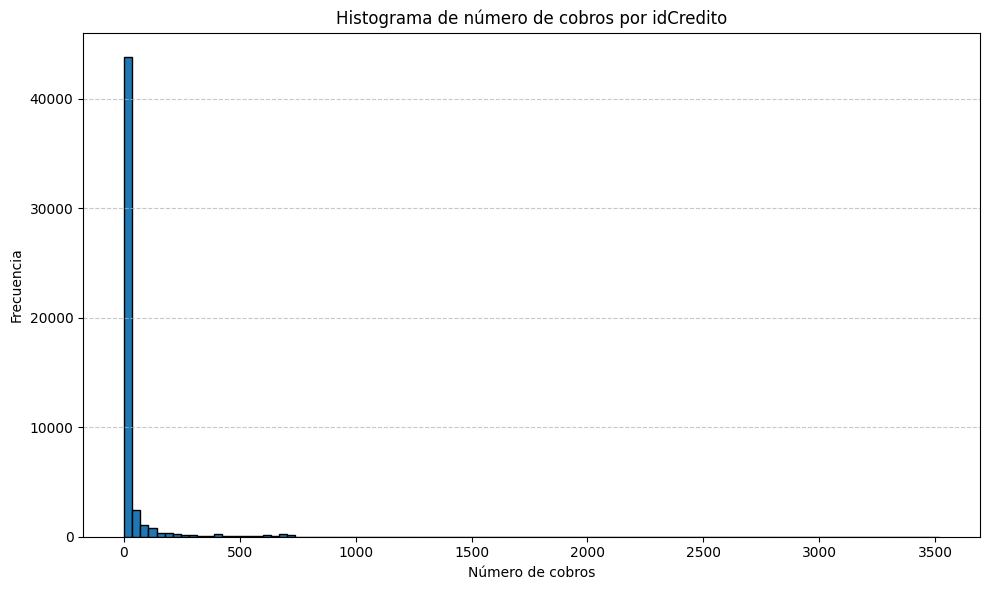

In [85]:
import matplotlib.pyplot as plt

# Crear histograma de la columna 'num_cobros'
plt.figure(figsize=(10, 6))
# plt.hist(estadistica_final0['num_cobros'], bins=range(1, estadistica_final0['num_cobros'].max() + 2), edgecolor='black')
plt.hist(estadistica_final0['num_cobros'], bins=100, edgecolor='black')
plt.title('Histograma de número de cobros por idCredito')
plt.xlabel('Número de cobros')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.xticks(range(1, estadistica_final0['num_cobros'].max() + 1))
plt.tight_layout()
plt.show()